<div style = "padding : 20px; background-color : red; color : white">
<h1 style = "text-align:center"> Analyse des données </h1>
</div>

In [1]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Récupération du dataset nettoyé
df_ventes = pd.read_csv("data/all_data.csv")
df_ventes.price.describe()

count    336713.000000
mean         17.215189
std          17.855445
min           0.620000
25%           8.610000
50%          13.900000
75%          18.990000
max         300.000000
Name: price, dtype: float64

# Tendances centrales et dispersions

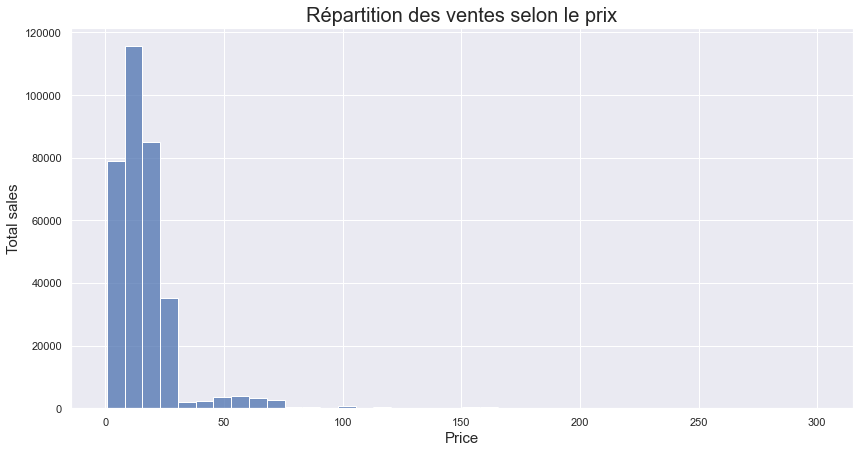

In [2]:
#define figure size
sns.set(rc={"figure.figsize":(14, 7)})
plt.title('Répartition des ventes selon le prix', fontsize =20)
sns.histplot(data=df_ventes, x="price", bins=40)
plt.xlabel("Price", fontsize =15)
plt.ylabel("Total sales", fontsize =15)
plt.savefig('figures/histo.png')
plt.show()

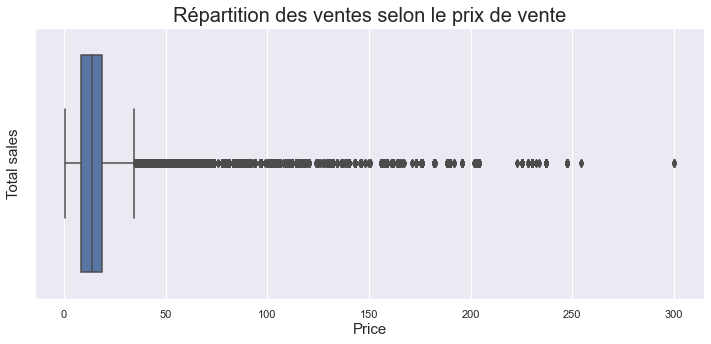

In [3]:
sns.set(rc={"figure.figsize":(12, 5)})
sns.boxplot( x=df_ventes["price"]);
plt.title('Répartition des ventes selon le prix de vente',  fontsize =20)
plt.xlabel("Price", fontsize =15)
plt.ylabel("Total sales", fontsize =15)
plt.savefig('figures/boxplot.png')
plt.show()

**Conclusion** : Une très grosse majorité des ventes correspond à des prix entre 8 et 19.

# Analyse de concentration / Courbe de Lorenz / Calcul du coefficient de Gini

In [4]:

def gini(arr):
    sorted_arr = arr.copy()
    sorted_arr.sort()
    n = arr.size
    coef_ = 2. / n
    const_ = (n + 1.) / n
    weighted_sum = sum([(i+1)*yi for i, yi in enumerate(sorted_arr)])
    return coef_*weighted_sum/(sorted_arr.sum()) - const_

def to_scale(arr) :
    arr.sort()
    array_scaled = arr.cumsum() / arr.sum()
    array_scaled = np.insert(array_scaled,0,0)
    return array_scaled

In [5]:
prices = np.array(df_ventes.price)
prices_scaled = to_scale(prices)


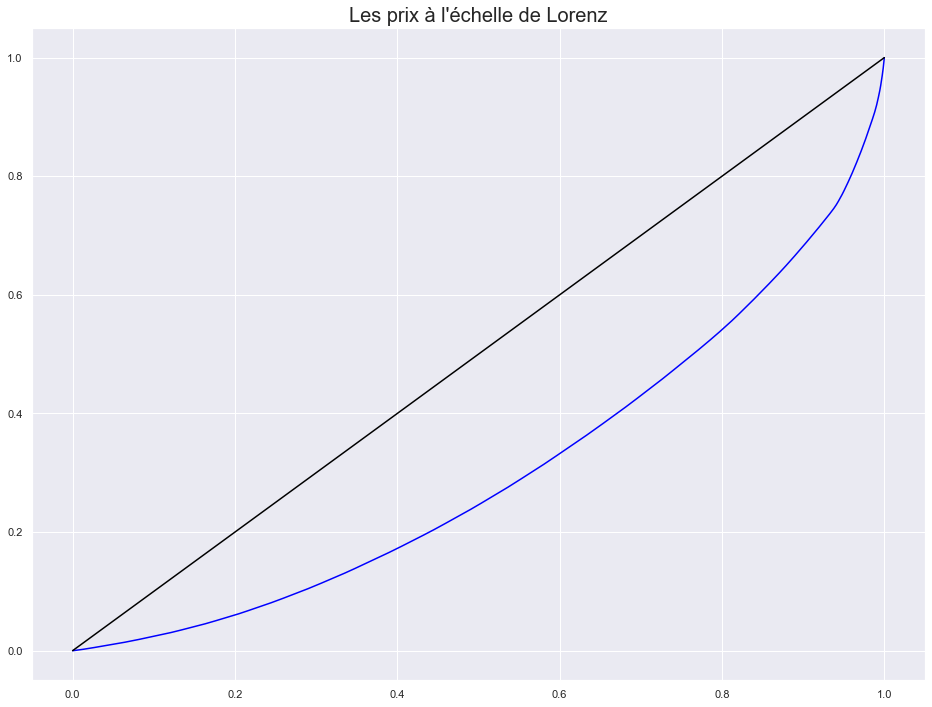

Le coefficient de Gini est de 0.3921455108917651


In [6]:
x = np.arange(prices_scaled.size)/(prices_scaled.size - 1)
y = prices_scaled

plt.figure(figsize=(16,12))
plt.plot(x, y, color='blue'  )
plt.plot([0,1], [0,1], color='black')
plt.title('Les prix à l\'échelle de Lorenz', fontsize = 20)
plt.savefig('figures/lorenz.png')
plt.show()
print("Le coefficient de Gini est de {}".format(gini(prices)))


**Note : Le coefficient de Gini est un nombre variant de 0 à 1, où 0 signifie l'égalité parfaite, et 1 ( qui ne peut être atteint ) signifie l'inégalité parfaite** 

**Conclusion** : Bien que la majorité des ventes se font à petits prix, on se rend compte que les ventes à prix élevés ont un impact significatif sur la recette totale. La courbe de Lorenz ne montrant pas non plus une forte inégalité, on peut penser que les prix actuelles sont bien équilibrés.

## Analyse des ventes dans le temps / Représentation de série temporelle

In [7]:
df_ventes['date'] = df_ventes['date'].map(lambda x : x[:10])
df_ventes.head(10)

,id_prod,price,categ,date,session_id,client_id,sex,birth,year,month,day,age
0,0_1421,19.99,0,2021-05-12,s_33709,c_7954,m,1973,2021,5,12,48
1,0_1142,3.42,0,2021-03-24,s_10590,c_7954,m,1973,2021,3,24,48
2,0_1446,8.09,0,2021-11-26,s_125461,c_7954,m,1973,2021,11,26,48
3,0_2291,12.99,0,2021-05-29,s_41299,c_7954,m,1973,2021,5,29,48
4,1_385,25.99,1,2021-06-01,s_42731,c_7954,m,1973,2021,6,1,48
5,1_129,18.99,1,2022-01-14,s_149535,c_7954,m,1973,2022,1,14,49
6,0_2267,18.99,0,2021-12-08,s_131181,c_7954,m,1973,2021,12,8,48
7,1_250,20.76,1,2021-09-20,s_92903,c_7954,m,1973,2021,9,20,48
8,0_1081,11.99,0,2022-02-27,s_171856,c_7954,m,1973,2022,2,27,49
9,0_1009,14.99,0,2021-07-24,s_66661,c_7954,m,1973,2021,7,24,48


In [8]:
df_daily_sales = df_ventes.groupby("date")['price'].sum().reset_index(name='daily_incomes')
df_daily_sales.head()

,date,daily_incomes
0,2021-03-01,16416.24
1,2021-03-02,15337.47
2,2021-03-03,14751.75
3,2021-03-04,15047.09
4,2021-03-05,17173.41


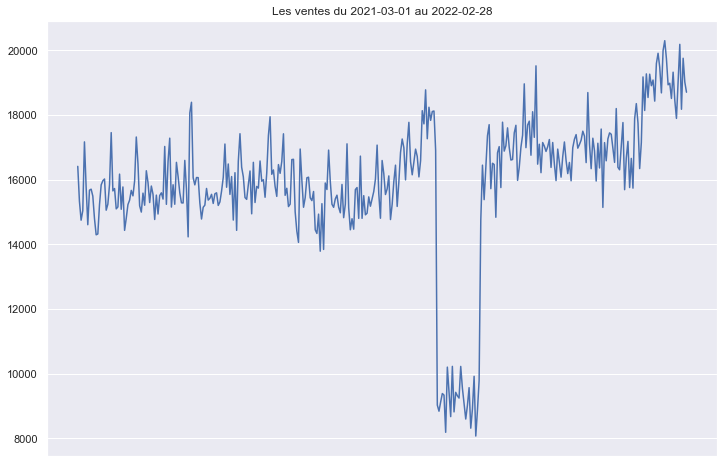

In [9]:
plt.figure(figsize=(12,8))
plt.plot(df_daily_sales.date, df_daily_sales.daily_incomes  )
plt.title('Les ventes du {} au {}'.format(df_daily_sales.date[0], df_daily_sales.date[len(df_daily_sales.date)-1]))
plt.gca().axes.get_xaxis().set_visible(False)
plt.savefig('figures/daily_sales.png') # /!\ ne fonctionne pas mettre après show
plt.show()

In [10]:
df_monthly_sales = df_ventes.groupby(["year","month"])['price'].sum().reset_index(name='monthly_incomes')
df_monthly_sales

,year,month,monthly_incomes
0,2021,3,479312.03
1,2021,4,472980.72
2,2021,5,489367.95
3,2021,6,481257.94
4,2021,7,480898.66
5,2021,8,479305.19
6,2021,9,502771.28
7,2021,10,319159.96
8,2021,11,512890.17
9,2021,12,522937.68


In [11]:
month_map={
    1:"January",
    2:"Febuary",
    3:"March",
    4:"April",
    5:"May",
    6:"June",
    7:"July",
    8:"August",
    9: "September",
    10:"October",
    11:"November",
    12:"December"
}
df_monthly_sales['month'] = df_monthly_sales['month'].replace(month_map)
df_monthly_sales


,year,month,monthly_incomes
0,2021,March,479312.03
1,2021,April,472980.72
2,2021,May,489367.95
3,2021,June,481257.94
4,2021,July,480898.66
5,2021,August,479305.19
6,2021,September,502771.28
7,2021,October,319159.96
8,2021,November,512890.17
9,2021,December,522937.68


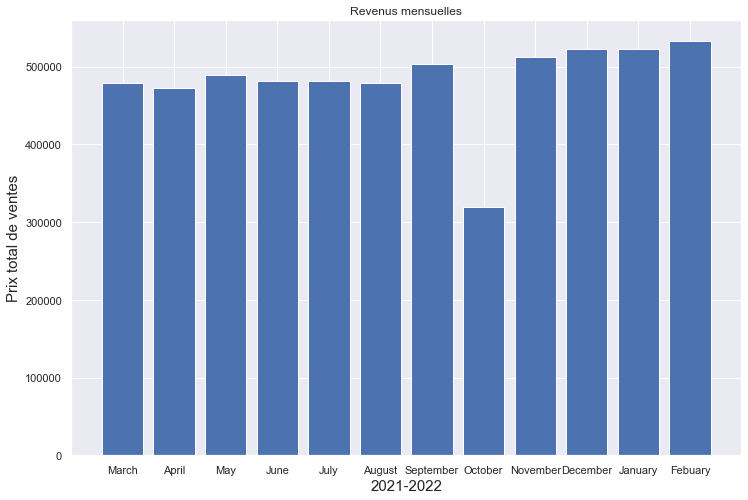

In [12]:
#define figure size
# sns.set(rc={"figure.figsize":(12, 8 )})
plt.figure(figsize=(12,8))
plt.title('Revenus mensuelles')
plt.bar(df_monthly_sales.month, df_monthly_sales.monthly_incomes )
plt.xlabel("2021-2022", fontsize =15)
plt.ylabel("Prix total de ventes", fontsize =15)
# plt.gca().set_xticks(df_monthly_sales.month)
plt.savefig('figures/monthly_sales.png') 
plt.show()

**Conclusion :** Le mois d'octobre 2021 a été compliqué. A part cette anomalie dans le chiffre d'affaire, les recettes mensuelles depuis un an sont semsiblement les mêmes ( c'est à dire autour de 50 000 ). La tendance des derniers mois montre une légère hausse.

# Recherche de corrélations

### Y a-t-il une corrélation entre le sexe des clients et les catégories de produits achetés ?

In [13]:
# Création d'un tableau de contingence entre le sexe et les catégories
table = pd.crosstab(df_ventes.sex, df_ventes.categ)
print(table)



categ       0      1     2
sex                       
f      103786  55469  8260
m      105640  54266  9292


In [14]:
# Réalisation du test de chi2_pour connaître la p-value

from scipy.stats import chi2_contingency
resultats = chi2_contingency(table)
print("p_value =", resultats[1])
print("degrés de liberté : ", resultats[2])

p_value = 1.6683997257127539e-18
degrés de liberté :  2


**Réponse :**  
Nous avons une p_value très proche de zéro, ce qui permet de conclure qu'il n'y a aucune corrélation entre le sexe des clients et les catégories de produits achetés. 

### Y a-t-il une corrélation entre l'âge des clients et le montant total des achats ?

In [15]:
df_temp = df_ventes.groupby("age")['price'].sum().reset_index(name='total')
df_temp

,age,total
0,17,240669.91
1,18,127250.03
2,19,90576.22
3,20,83495.81
4,21,80114.55
...,...,...
72,89,2887.61
73,90,1664.94
74,91,1809.92
75,92,1332.17


In [16]:
df_temp.corr()

,age,total
age,1.000000,-0.820558
total,-0.820558,1.000000


Les valeurs semblent fortement corrélés. 

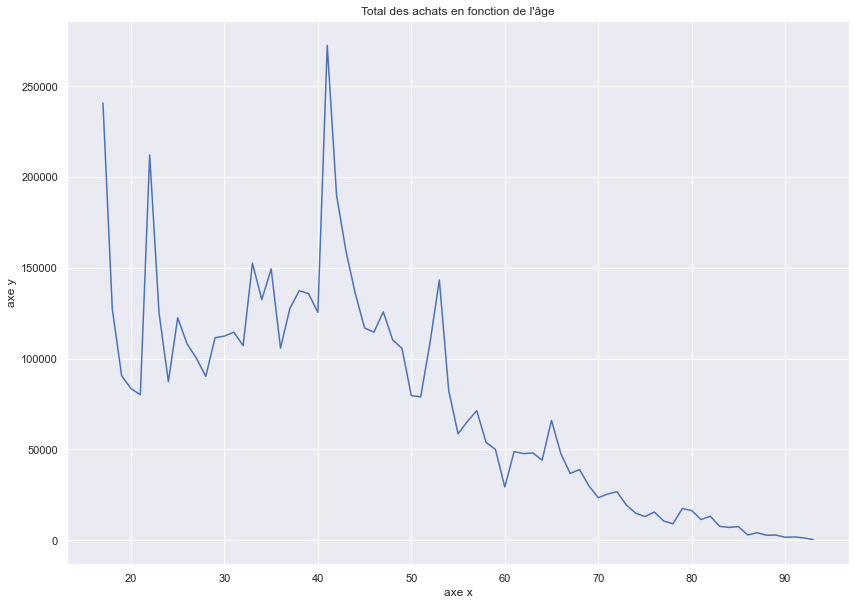

In [17]:
plt.figure(figsize=(14,10))
plt.plot(df_temp.age, df_temp.total )
plt.title('Total des achats en fonction de l\'âge')
plt.xlabel('axe x')
plt.ylabel('axe y')
plt.savefig('figures/incomes_by_age.png') 
plt.show()

**Réponse :**
Les clients jeunes dépensent plus que les clients les plus âgées. 

### Y a-t-il une corrélation entre l'âge des clients et la fréquence d'achat ?

In [18]:
df_temp = df_ventes.groupby(["client_id", "age"]).size().reset_index(name="total_purchases")
print(df_temp)


      client_id  age  total_purchases
0           c_1   66               19
1           c_1   67                1
2          c_10   65               28
3         c_100   29                6
4        c_1000   55               42
...         ...  ...              ...
15794     c_997   28                4
15795     c_998   20               24
15796     c_998   21                4
15797     c_999   57               17
15798     c_999   58                5

[15799 rows x 3 columns]


In [19]:
df_temp = df_temp.groupby(['age']).mean().reset_index()
df_temp

,age,total_purchases
0,17,13.625287
1,18,6.722689
2,19,9.118367
3,20,8.752137
4,21,9.488789
...,...,...
72,89,14.750000
73,90,10.555556
74,91,15.142857
75,92,14.166667


In [20]:
df_temp.corr()[['age','total_purchases']]

,age,total_purchases
age,1.000000,-0.288375
total_purchases,-0.288375,1.000000


Les valeurs sont corrélées.

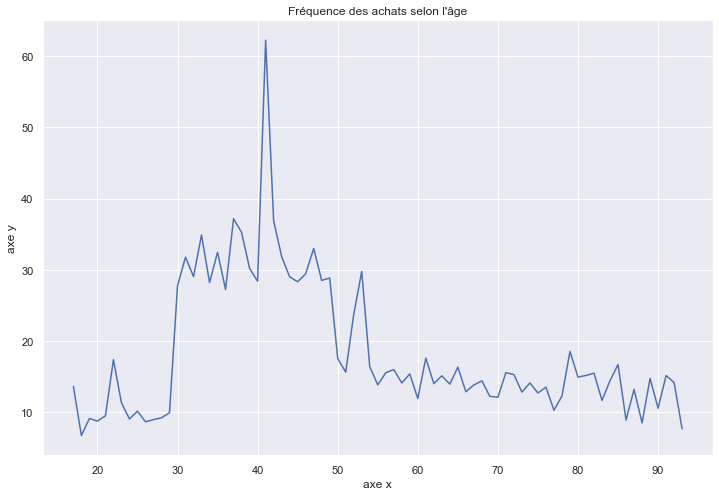

In [21]:
plt.figure(figsize=(12,8))
plt.plot(df_temp.age, df_temp.total_purchases )
plt.title('Fréquence des achats selon l\'âge')
plt.xlabel('axe x')
plt.ylabel('axe y')
plt.savefig('frequency_by_age.png') 
plt.show()

**Réponse :**
Les achats sont plus fréquent pour les clients agés de 30 à 55 ans environs.

### Y'a t-il une corrélation entre l'age du client et la taille du panier moyen

In [22]:
# Calcul du panier moyen par session
df_temp = df_ventes.groupby("session_id").size().reset_index(name="articles_in_session")
df_temp.head()


,session_id,articles_in_session
0,s_1,1
1,s_10,1
2,s_100,2
3,s_1000,4
4,s_10000,3


In [23]:
# ajout du panier moyen dans notre dataframe
df_ventes = df_ventes.merge(df_temp, left_on='session_id', right_on='session_id')

df_temp = df_ventes.groupby("age")["articles_in_session"].mean().reset_index(name="mean_articles")
df_temp

,age,mean_articles
0,17,2.628817
1,18,2.607500
2,19,2.686661
3,20,2.605469
4,21,2.745747
...,...,...
72,89,2.322034
73,90,2.242105
74,91,3.132075
75,92,1.729412


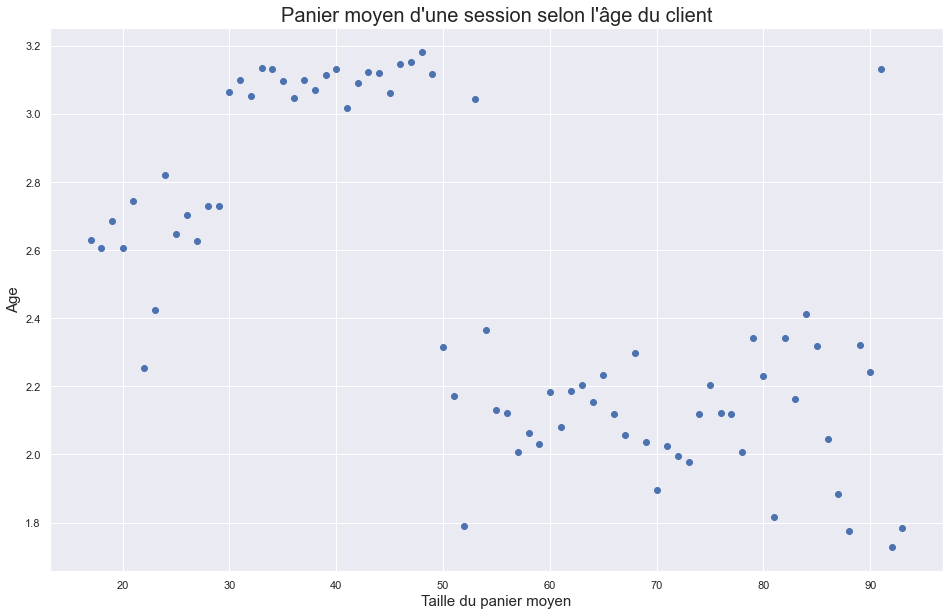

In [26]:
# plot
plt.figure(figsize=(16,10))
plt.title("Panier moyen d'une session selon l'âge du client", fontsize = 20)
plt.xlabel("Taille du panier moyen",fontsize = 15)
plt.ylabel("Age",fontsize = 15)
plt.scatter(df_temp.age, df_temp.mean_articles)
plt.savefig('figures/panier_moyen.png') 
plt.show()

**Concusion** : Le montant du panier moyen des clients jeunes est beaucoup plus élevé que celui des personnes âgées ( sauf pour les 91 ans... )

### Y'a t-il une corrélation entre l'age du client et la catégorie de produit acheté

In [27]:
table = pd.crosstab(df_ventes.age, df_ventes.categ)
print(table)

categ     0     1     2
age                    
17     1396  2150  2381
18      682  1249  1269
19      505   835   894
20      460   761   827
21      551   773   792
..      ...   ...   ...
89       83    92     2
90       36    59     0
91       44    61     1
92       35    49     1
93        6    17     0

[77 rows x 3 columns]


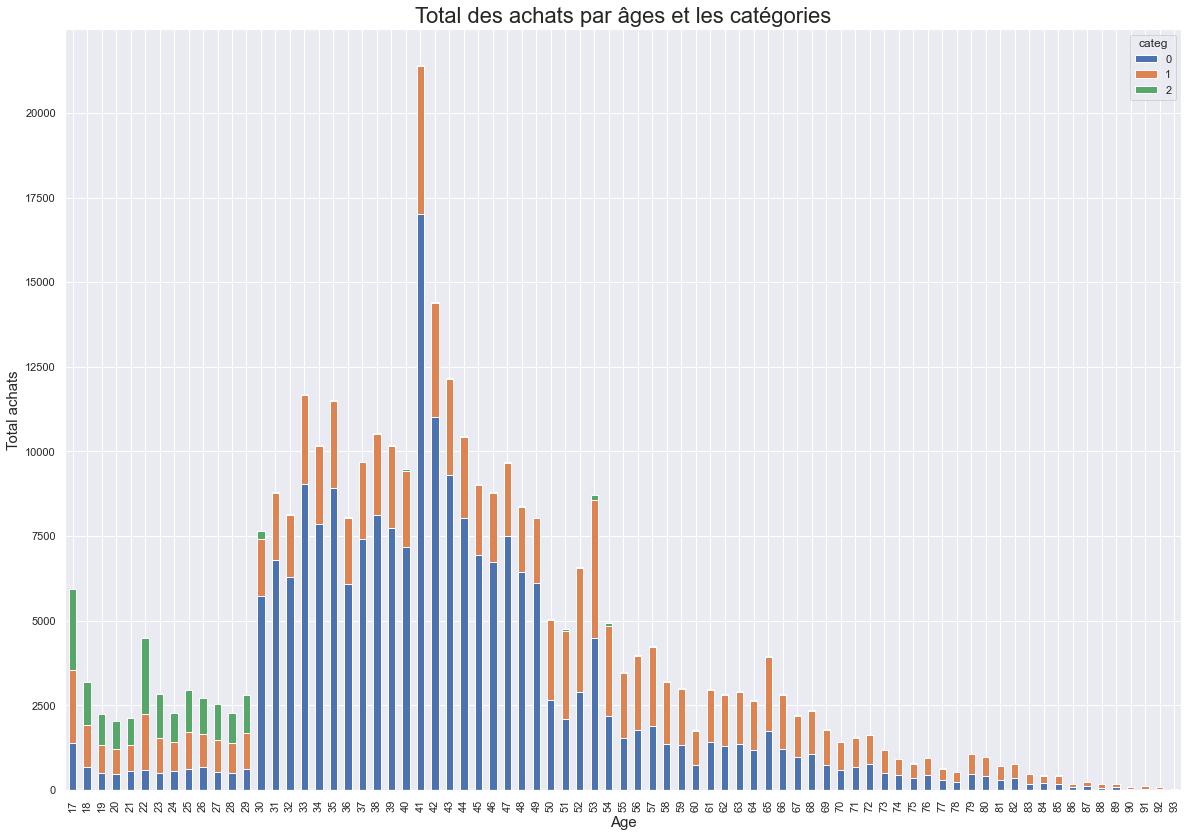

In [28]:
#stacked_data = plotdata.apply(lambda x: x*100/sum(x), axis=1)
# plot
sns.set(rc={"figure.figsize":(20, 14)})


table.plot(kind="bar", stacked=True)
plt.title("Total des achats par âges et les catégories", fontsize = 22)
plt.xlabel("Age", fontsize = 15)
plt.ylabel("Total achats", fontsize =15)
plt.savefig('figures/sales_by_categories_and_age.png')            
plt.show()

**Concusion** : On remarque sur ce graphique une forte disparité des ventes par catégories selon les ages. 
Les livres de la catégorie 0 sont très majoritairement achetés par lesjeunes ( les moins de 30 ans ) et quasiment pas achetés par les plus agés.